In [1]:
import numpy as np 
import pandas as pd 
import data_clean_utility
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder



In [2]:
import dagshub
dagshub.init(repo_owner='vinayak910', repo_name='swiggy-delivery-time-prediction', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=379a460e-f28e-4168-ba43-abc82dadd4a1&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=92eb2974c8faf09a2e8a0338daea0b2731abbbcbece51d9a18d429cd4a6a717f




Accessing as vinayak910

Initialized MLflow to track repo "vinayak910/swiggy-delivery-time-prediction"

Repository vinayak910/swiggy-delivery-time-prediction initialized!

In [6]:
import mlflow 

mlflow.set_tracking_uri("https://dagshub.com/vinayak910/swiggy-delivery-time-prediction.mlflow")

In [11]:
from sklearn import set_config

set_config(transform_output= "pandas")

In [12]:
df = pd.read_csv("swiggy.csv")

In [14]:
data_clean_utility.perform_data_cleaning(df)

In [15]:
df = pd.read_csv("swiggy_cleaned.csv")

In [16]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [17]:
columns_to_drop =  [
    'rider_id',
    'restaurant_latitude',
    'restaurant_longitude', 
    'delivery_latitude', 
    'delivery_longitude',
    'order_date',
    'order_day',
    'order_month',
    'order_day_of_week',
    'order_time_hour',
    'city_name'
]

In [18]:
df.drop(columns= columns_to_drop, inplace=True)

In [19]:
df.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'is_weekend', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [20]:
df.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium


In [21]:
df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

<Axes: >

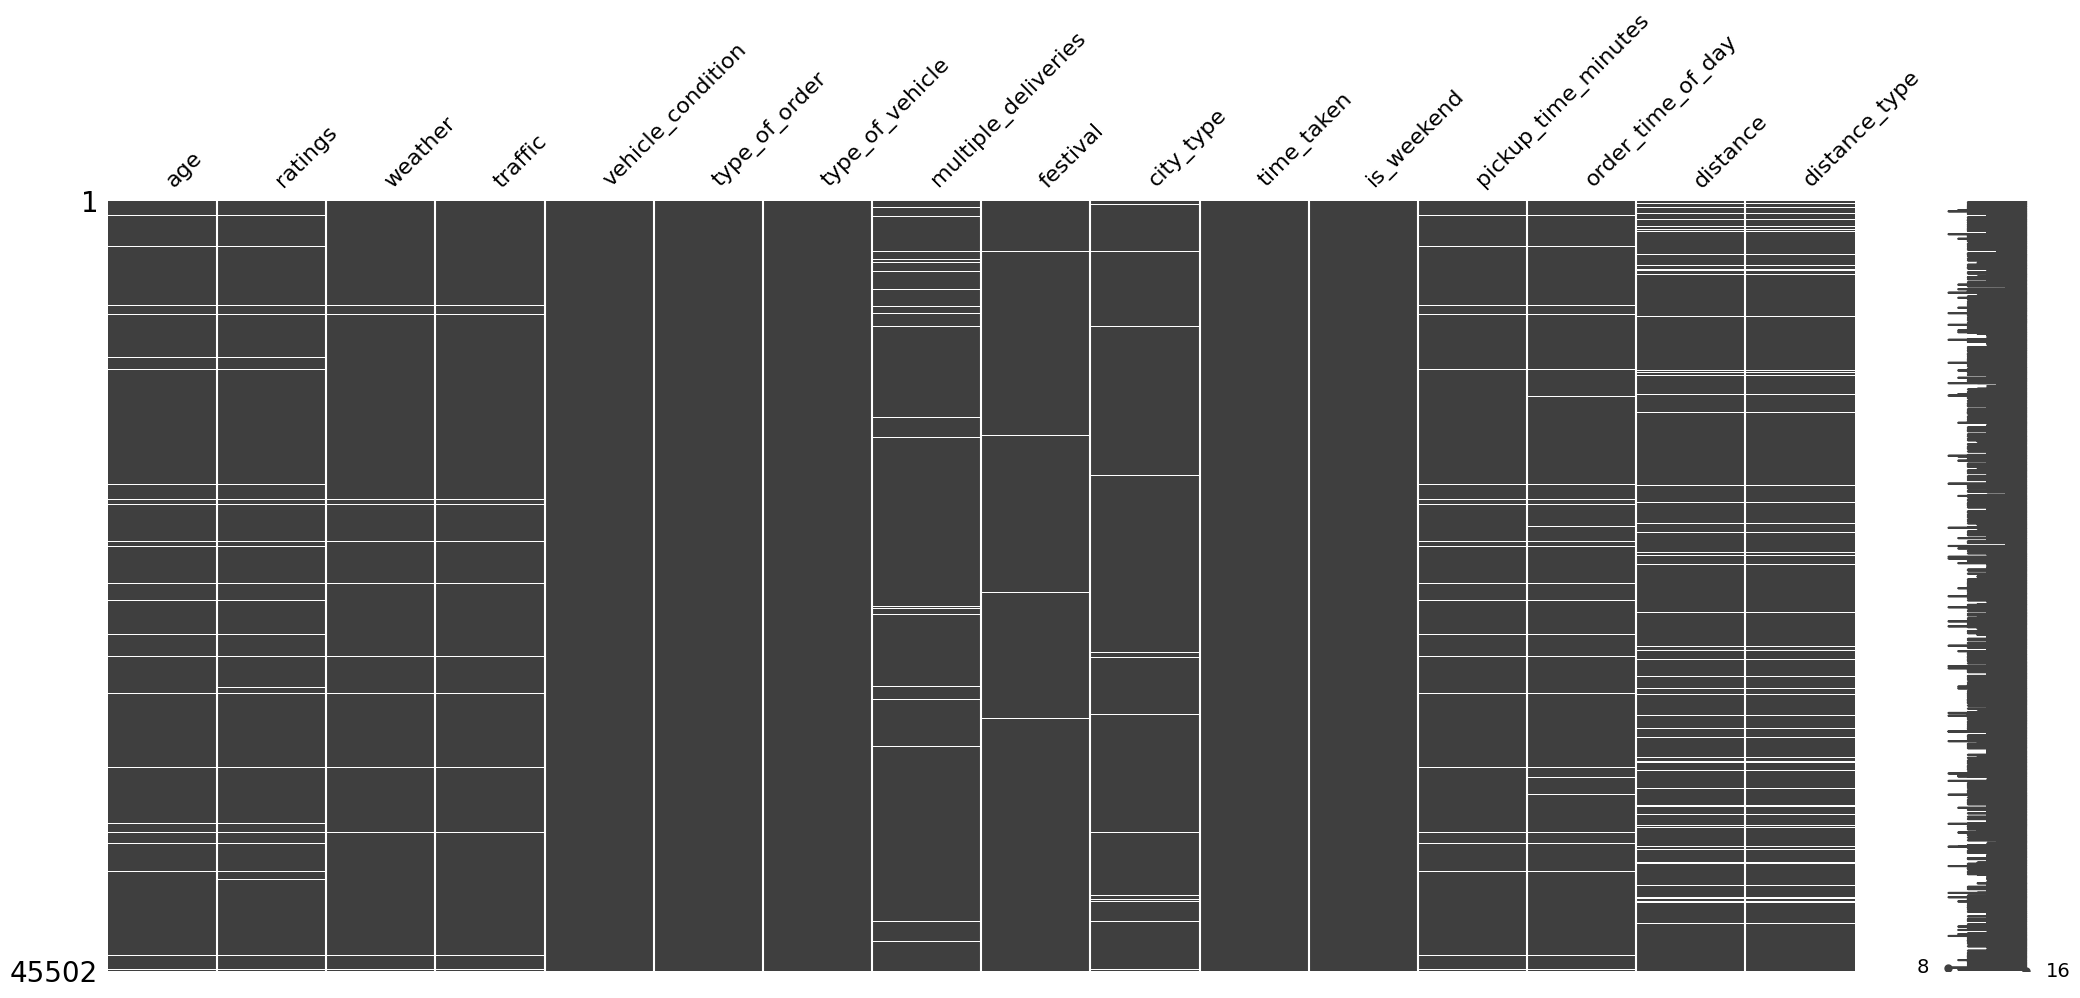

In [22]:
import missingno as msno 

msno.matrix(df)

In [24]:
missing_cols = (
    df
    .isna()
    .any(axis = 0)
    .loc[lambda x:x]
    .index
)

In [25]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

### Drop Missing Values

In [26]:
import mlflow 
mlflow.set_tracking_uri("https://dagshub.com/vinayak910/swiggy-delivery-time-prediction.mlflow")

In [27]:
mlflow.set_experiment(experiment_name= "Exp1 - drop vs keep missing values")

2025/07/11 11:29:54 INFO mlflow.tracking.fluent: Experiment with name 'Exp1 - drop vs keep missing values' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/02125e659fc54cdc8463b1525b511000', creation_time=1752213593486, experiment_id='1', last_update_time=1752213593486, lifecycle_stage='active', name='Exp1 - drop vs keep missing values', tags={}>

In [28]:
temp_df = df.copy().dropna()

In [29]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

In [30]:
X.shape

(37695, 15)

In [32]:
X.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.210138,medium


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape , y_train.shape

((30156, 15), (30156,))

In [35]:
X_test.shape , y_test.shape

((7539, 15), (7539,))

In [37]:
X_train.isna().sum().sum() , X_test.isna().sum().sum()

(np.int64(0), np.int64(0))

In [38]:
X_train.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'is_weekend', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [52]:
num_cols = ['age','ratings','pickup_time_minutes','distance']

nom_cat_cols = ['weather', 'type_of_order', 'type_of_vehicle','festival',
                'city_type', 'is_weekend','order_time_of_day']

ordinal_cat_cols = ['traffic','distance_type']

In [53]:
for col in ordinal_cat_cols:
    print(col , temp_df[col].unique())

traffic ['high' 'jam' 'low' 'medium']
distance_type ['short' 'very_long' 'medium' 'long']


In [54]:
traffic_order = ['low','medium','high','jam']

distance_type = ['short', 'medium', 'long', 'very_long']

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), num_cols),
        ('ordinal_encode', OrdinalEncoder(categories=[traffic_order,distance_type],
                                          ),ordinal_cat_cols),
        ('nominal_encode', OneHotEncoder(drop = 'first',handle_unknown= 'ignore', sparse_output= False), nom_cat_cols)
    ],remainder= 'passthrough',n_jobs=-1,force_int_remainder_cols = False , verbose_feature_names_out=False 
)

preprocessor.set_output(transform= "pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [67]:
X_train_processed = preprocessor.fit_transform(X_train)

X_test_processed = preprocessor.transform(X_test)

In [68]:
X_train_processed.loc[0]

age                           1.277871
ratings                       0.850593
pickup_time_minutes           1.227064
distance                     -1.199750
traffic                       2.000000
distance_type                 0.000000
weather_fog                   0.000000
weather_sandstorms            0.000000
weather_stormy                0.000000
weather_sunny                 1.000000
weather_windy                 0.000000
type_of_order_drinks          0.000000
type_of_order_meal            0.000000
type_of_order_snack           1.000000
type_of_vehicle_motorcycle    1.000000
type_of_vehicle_scooter       0.000000
festival_yes                  0.000000
city_type_semi-urban          0.000000
city_type_urban               1.000000
is_weekend_1                  1.000000
order_time_of_day_evening     0.000000
order_time_of_day_morning     1.000000
order_time_of_day_night       0.000000
vehicle_condition             2.000000
multiple_deliveries           0.000000
Name: 0, dtype: float64

In [69]:
X_train_processed.columns

Index(['age', 'ratings', 'pickup_time_minutes', 'distance', 'traffic',
       'distance_type', 'weather_fog', 'weather_sandstorms', 'weather_stormy',
       'weather_sunny', 'weather_windy', 'type_of_order_drinks',
       'type_of_order_meal', 'type_of_order_snack',
       'type_of_vehicle_motorcycle', 'type_of_vehicle_scooter', 'festival_yes',
       'city_type_semi-urban', 'city_type_urban', 'is_weekend_1',
       'order_time_of_day_evening', 'order_time_of_day_morning',
       'order_time_of_day_night', 'vehicle_condition', 'multiple_deliveries'],
      dtype='object')

In [65]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [66]:
pt.lambdas_

array([0.32446096])

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_processed,y_train_pt)

y_pred_train = rf.predict(X_train_processed)

y_pred_test = rf.predict(X_test_processed)

d:\DSMP  cntd\1. MLOPS\3. MLOPs projects\2. swiggy-delievery-time-prediction\swiggy-delivery-time-prediction\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [71]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))

y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))

In [74]:
from sklearn.metrics import mean_absolute_error, r2_score

print(mean_absolute_error(y_train,y_pred_train_org))
print(mean_absolute_error(y_test,y_pred_test_org))


1.1529351973268662
3.089663921702061


In [76]:
print(r2_score(y_train,y_pred_train_org))
r2_score(y_test,y_pred_test_org)

0.9755641830963673


0.826541022224581

In [79]:
type(y_train_pt)

pandas.core.frame.DataFrame

In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train_processed,y_train_pt.values.ravel(),cv = 5 , scoring = 'r2',n_jobs = -1 )

In [82]:
scores

array([0.8082727 , 0.8110058 , 0.81058362, 0.81050028, 0.81161206])

In [83]:
scores.mean()

np.float64(0.8103948936803602)

<Axes: >

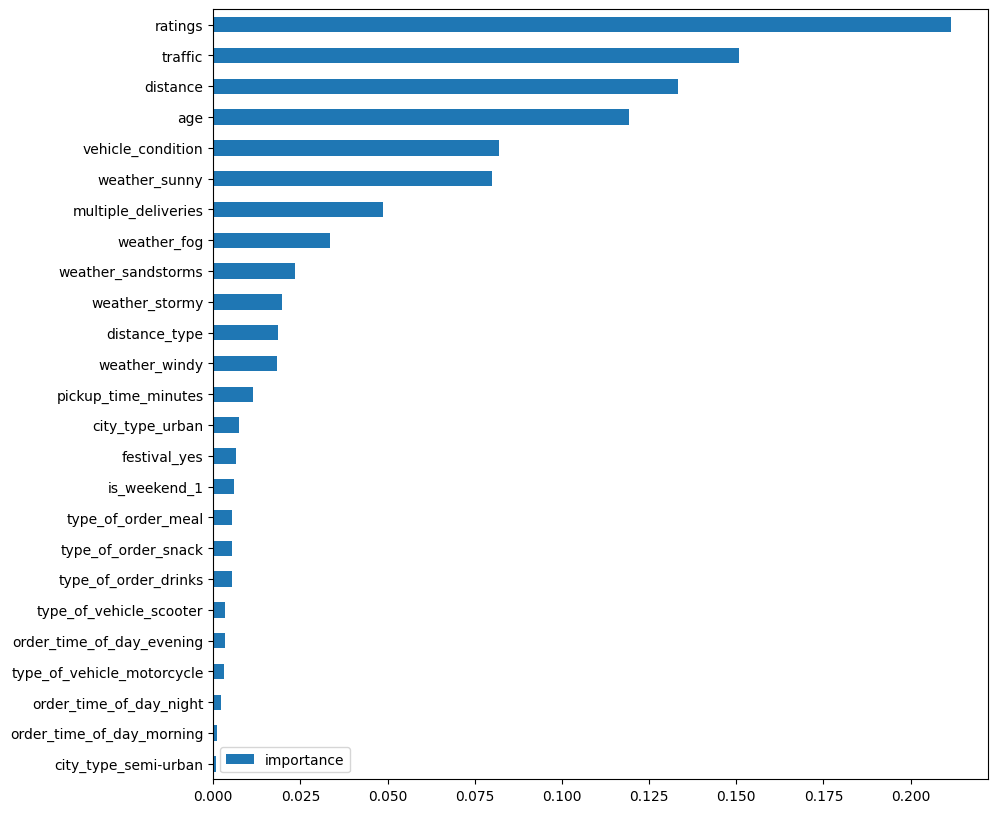

In [85]:
(pd.DataFrame(rf.feature_importances_,
              index = X_train_processed.columns,
              columns = ['importance'])
              .sort_values(by = 'importance')
              .plot(kind = 'barh', figsize=(10,10))
              )

In [86]:
with mlflow.start_run(run_name="Drop Missing Values"):

    mlflow.log_param("experiment_type", "Drop Missing Values")

    mlflow.log_params(rf.get_params())

    mlflow.log_metric("training_error", mean_absolute_error(y_train,y_pred_train_org))

    mlflow.log_metric("test_error", mean_absolute_error(y_test,y_pred_test_org))

    mlflow.log_metric("training_r2", r2_score(y_train, y_pred_train_org))
    
    mlflow.log_metric("test_r2", r2_score(y_test, y_pred_test_org))
    


🏃 View run Drop Missing Values at: https://dagshub.com/vinayak910/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/f056937c445a4bb5b3eafeb1f69ee99b
🧪 View experiment at: https://dagshub.com/vinayak910/swiggy-delivery-time-prediction.mlflow/#/experiments/1


### Impute Missing Values

In [191]:
temp_df = df.copy()

In [192]:
temp_df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [193]:
X = temp_df.drop(columns= 'time_taken')
y = temp_df['time_taken']

In [194]:
X.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.210138,medium


In [195]:
X.shape

(45502, 15)

In [196]:
X.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'is_weekend', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [197]:
y.shape

(45502,)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
X_train.shape , X_test.shape

((36401, 15), (9101, 15))

In [200]:
X_test.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'is_weekend', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [201]:
missing_cols = (X_test
 .isna()
 .any(axis =0)
 .loc[lambda x : x]
 .index)

In [202]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [203]:
X_train.isna().sum()

age                    1470
ratings                1510
weather                 421
traffic                 407
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     795
festival                188
city_type               968
is_weekend                0
pickup_time_minutes    1298
order_time_of_day      1646
distance               2931
distance_type          2931
dtype: int64

In [204]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))

y_test_pt = pt.transform(y_test.values.reshape(-1,1))


In [205]:
nom_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'is_weekend',
 'order_time_of_day']

In [206]:
ordinal_cat_cols

['traffic', 'distance_type']

In [207]:
num_cols

['age', 'ratings', 'pickup_time_minutes', 'distance']

In [208]:
features_to_fill_mode = ['multiple_deliveries','festival','city_type']

features_to_fill_missing = [col for col in nom_cat_cols if col not in features_to_fill_mode]

In [209]:
features_to_fill_mode

['multiple_deliveries', 'festival', 'city_type']

In [210]:
features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'is_weekend',
 'order_time_of_day']

In [211]:
simple_imputer = ColumnTransformer(transformers=[
    ('mode_imputer', SimpleImputer(strategy="most_frequent"), features_to_fill_mode),
    ('missing_imputer',SimpleImputer(strategy='constant',fill_value="missing"),features_to_fill_missing)
], remainder='passthrough',n_jobs=-1,force_int_remainder_cols = False, verbose_feature_names_out=False)

In [212]:
simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'is_weekend', 'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [213]:
temp_df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [214]:
simple_imputer.fit_transform(X_train)

,multiple_deliveries,festival,city_type,weather,type_of_order,type_of_vehicle,is_weekend,order_time_of_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance,distance_type
11029,1.0,no,metropolitian,windy,snack,electric_scooter,0,evening,26.0,4.7,jam,2,10.0,9.177684,medium
15665,1.0,no,metropolitian,windy,drinks,motorcycle,0,afternoon,21.0,4.9,medium,2,5.0,6.081536,medium
14475,1.0,no,metropolitian,stormy,meal,scooter,1,missing,NaN,NaN,low,2,NaN,1.554563,short
29199,1.0,no,metropolitian,windy,buffet,motorcycle,0,evening,32.0,4.7,medium,0,15.0,20.852271,very_long
22514,0.0,no,urban,sandstorms,meal,scooter,0,night,34.0,4.9,jam,1,5.0,9.056096,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,no,metropolitian,sandstorms,meal,scooter,0,evening,29.0,4.7,jam,2,5.0,12.464367,long
44732,0.0,no,urban,cloudy,buffet,motorcycle,0,morning,36.0,4.8,low,0,10.0,1.520432,short
38158,0.0,no,metropolitian,fog,buffet,scooter,0,evening,36.0,4.4,jam,1,10.0,NaN,NaN
860,1.0,no,metropolitian,windy,meal,scooter,1,afternoon,25.0,4.9,medium,2,5.0,7.760938,medium


In [215]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]
     

# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [218]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), num_cols),
        ('nominal_encode', OneHotEncoder(drop='first',
                                         handle_unknown='ignore',
                                        sparse_output=False),nom_cat_cols),
        ('ordinal_encode', OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                          encoded_missing_value=-999,
                                          handle_unknown="use_encoded_value",
                                          unknown_value= -1), ordinal_cat_cols)
    ], remainder= "passthrough", n_jobs=-1, verbose_feature_names_out= False , 
    force_int_remainder_cols = False 
)

In [219]:
preprocessor.fit_transform(X_train)

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,weather_nan,...,city_type_nan,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,order_time_of_day_nan,traffic,distance_type,vehicle_condition,multiple_deliveries
11029,-0.620491,0.206793,0.000314,-0.099935,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2,1.0
15665,-1.489635,0.843644,-1.224509,-0.651999,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1.0
14475,NaN,NaN,NaN,-1.459188,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0
29199,0.422482,0.206793,1.225137,1.981721,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0,1.0
22514,0.770140,0.843644,-1.224509,-0.121615,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.099004,0.206793,-1.224509,0.486102,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2,0.0
44732,1.117797,0.525219,0.000314,-1.465274,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0
38158,1.117797,-0.748484,0.000314,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,-1.0,1,0.0
860,-0.794320,0.843644,-1.224509,-0.352551,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1.0


In [220]:
knn_imputer = KNNImputer(n_neighbors=5)


In [221]:
preprocessing_pipeline = Pipeline(steps = [
    ('simple_imputer', simple_imputer),
    ('preprocess',preprocessor),
    ('knn_imputer', knn_imputer)
])


In [222]:
processing_pipeline = Pipeline(steps=[
                                ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor),
                                ("knn_imputer",knn_imputer)
                            ])

In [223]:
rf = RandomForestRegressor()

In [224]:

model_pipe = Pipeline(steps=[
                                ("preprocessing",processing_pipeline),
                                ("model",rf)
                            ])


In [225]:
model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [226]:
model_pipe.fit(X_train,y_train_pt.values.ravel())

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [227]:
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))
     

from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")


print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")
     

# calculate the cross val score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_pipe,X_train,y_train_pt.values.ravel(),cv=5,scoring="r2")


scores
     

The train error is 1.22 minutes
The test error is 3.30 minutes
The train r2 score is 0.97
The test r2 score is 0.80


array([0.77746914, 0.78490163, 0.78318312, 0.77421919, 0.78014671])

In [228]:
with mlflow.start_run(run_name="Impute Missing Values"):
    mlflow.log_param("experiment_type", "Impute Missing Values")
    mlflow.log_params(rf.get_params())

    mlflow.log_metric("training_error", mean_absolute_error(y_train, y_pred_train_org))
    mlflow.log_metric("test_error", mean_absolute_error(y_test, y_pred_test_org))
    mlflow.log_metric("training_r2", r2_score(y_train, y_pred_train_org))
    mlflow.log_metric("test_r2", r2_score(y_test, y_pred_test_org))
    mlflow.log_metric("cross_val", scores.mean())
    mlflow.log_metric("cross_val_std", scores.std())

🏃 View run Impute Missing Values at: https://dagshub.com/vinayak910/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/4befed7a6573420ca40585da46508d21
🧪 View experiment at: https://dagshub.com/vinayak910/swiggy-delivery-time-prediction.mlflow/#/experiments/1
